In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações para a visualização
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)

# Carregar os dados
file_path = "/kaggle/input/state-of-data-brazil-2023/State_of_data_BR_2023_Kaggle - df_survey_2023.csv"
data = pd.read_csv(file_path)

# Configurar estilo do seaborn
sns.set(style="whitegrid")

# Listar todas as colunas do DataFrame
print("Colunas Originais:")
print(data.columns.tolist())

# Contar o número de colunas
num_colunas = len(data.columns)
print(f"Total de colunas: {num_colunas}")

Colunas Originais:
["('P0', 'id')", "('P1_a ', 'Idade')", "('P1_a_1 ', 'Faixa idade')", "('P1_b ', 'Genero')", "('P1_c ', 'Cor/raca/etnia')", "('P1_d ', 'PCD')", "('P1_e ', 'experiencia_profissional_prejudicada')", "('P1_e_1 ', 'Não acredito que minha experiência profissional seja afetada')", "('P1_e_2 ', 'Experiencia prejudicada devido a minha Cor Raça Etnia')", "('P1_e_3 ', 'Experiencia prejudicada devido a minha identidade de gênero')", "('P1_e_4 ', 'Experiencia prejudicada devido ao fato de ser PCD')", "('P1_f ', 'aspectos_prejudicados')", "('P1_f_1', 'Quantidade de oportunidades de emprego/vagas recebidas')", "('P1_f_2', 'Senioridade das vagas recebidas em relação à sua experiência')", "('P1_f_3', 'Aprovação em processos seletivos/entrevistas')", "('P1_f_4', 'Oportunidades de progressão de carreira')", "('P1_f_5', 'Velocidade de progressão de carreira')", "('P1_f_6', 'Nível de cobrança no trabalho/Stress no trabalho')", "('P1_f_7', 'Atenção dada diante das minhas opiniões e ideias

# Dados Gerais

In [4]:
# Total de respondentes
total_respondentes = data.shape[0]
print(f"Total de respondentes: {total_respondentes}")

Total de respondentes: 5293


Soma das porcentagens: 100.00%


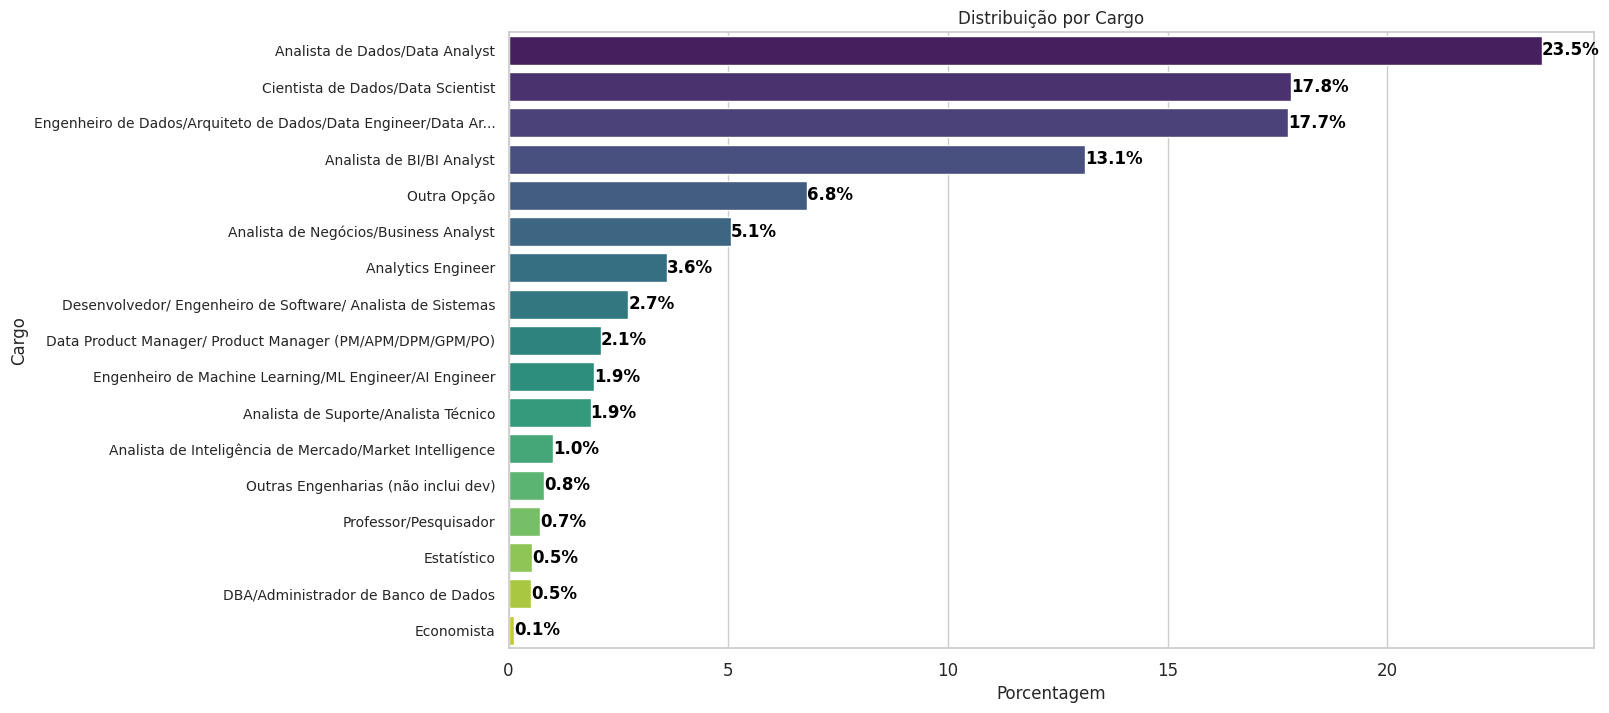

In [93]:
# Verificar se a coluna 'Cargo Atual' está no DataFrame
if "('P2_f ', 'Cargo Atual')" in data.columns:
    # Distribuição dos cargos
    distrib_cargo = data["('P2_f ', 'Cargo Atual')"].value_counts()

    # Calcular porcentagens
    total = distrib_cargo.sum()
    percentages = distrib_cargo / total * 100

    # Verificar se as porcentagens somam 100%
    sum_percentages = percentages.sum()
    print(f"Soma das porcentagens: {sum_percentages:.2f}%")

    # Truncar o texto das respostas se for muito longo
    truncated_labels = [label[:60] + '...' if len(label) > 60 else label for label in distrib_cargo.index]

    # Visualizar a distribuição dos cargos
    plt.figure(figsize=(14, 8))
    ax = sns.barplot(x=percentages.values, y=distrib_cargo.index.to_numpy(), palette="viridis")
    
    # Adicionar rótulos nos valores das barras
    for p, percentage in zip(ax.patches, percentages):
        x = p.get_width()
        y = p.get_y() + p.get_height() / 2
        ax.annotate(f'{percentage:.1f}%', (x, y), ha='left', va='center', fontsize=12, fontweight='bold', color='black')

    plt.title("Distribuição por Cargo")
    plt.xlabel("Porcentagem")
    plt.ylabel("Cargo")
    plt.xticks(fontsize=12)
    plt.yticks(ticks=range(len(truncated_labels)), labels=truncated_labels, fontsize=10)  # Ajustar tamanho da fonte para melhor legibilidade
    plt.show()
else:
    print("A coluna 'Cargo Atual' não foi encontrada no DataFrame.")

# Análise de IA

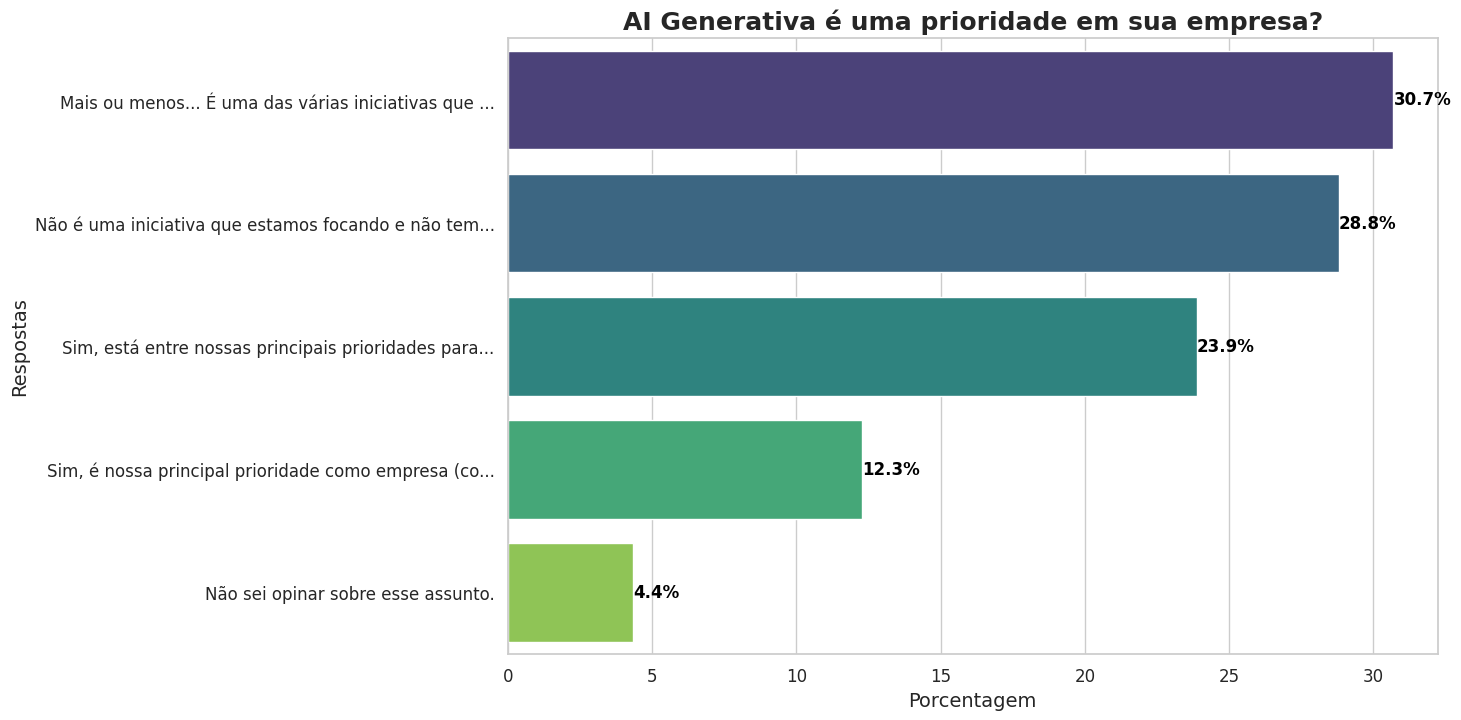

In [90]:
# Nome completo da coluna
column = "('P3_e ', 'AI Generativa é uma prioridade em sua empresa?')"

# Função para plotar gráfico individual com porcentagem e legendas truncadas
def plot_individual_analysis(data, column, title, xlabel='Porcentagem', ylabel='Respostas'):
    plt.figure(figsize=(12, 8))
    response_counts = data[column].value_counts()
    truncated_labels = [label[:50] + '...' if len(label) > 50 else label for label in response_counts.index]
    
    # Calcular porcentagens
    total = response_counts.sum()
    percentages = response_counts / total * 100
    
    ax = sns.barplot(x=percentages.values, y=response_counts.index.to_numpy(), palette='viridis')
    
    for p, percentage in zip(ax.patches, percentages):
        x = p.get_width()
        y = p.get_y() + p.get_height() / 2
        ax.annotate(f'{percentage:.1f}%', (x, y), ha='left', va='center', fontsize=12, fontweight='bold', color='black')
    
    plt.title(title, fontsize=18, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(ticks=range(len(truncated_labels)), labels=truncated_labels, fontsize=12)  # Reduzir tamanho do texto das legendas
    plt.show()

# Análise individual para a pergunta sobre AI Generativa
plot_individual_analysis(data, column, 'AI Generativa é uma prioridade em sua empresa?', ylabel='Respostas')

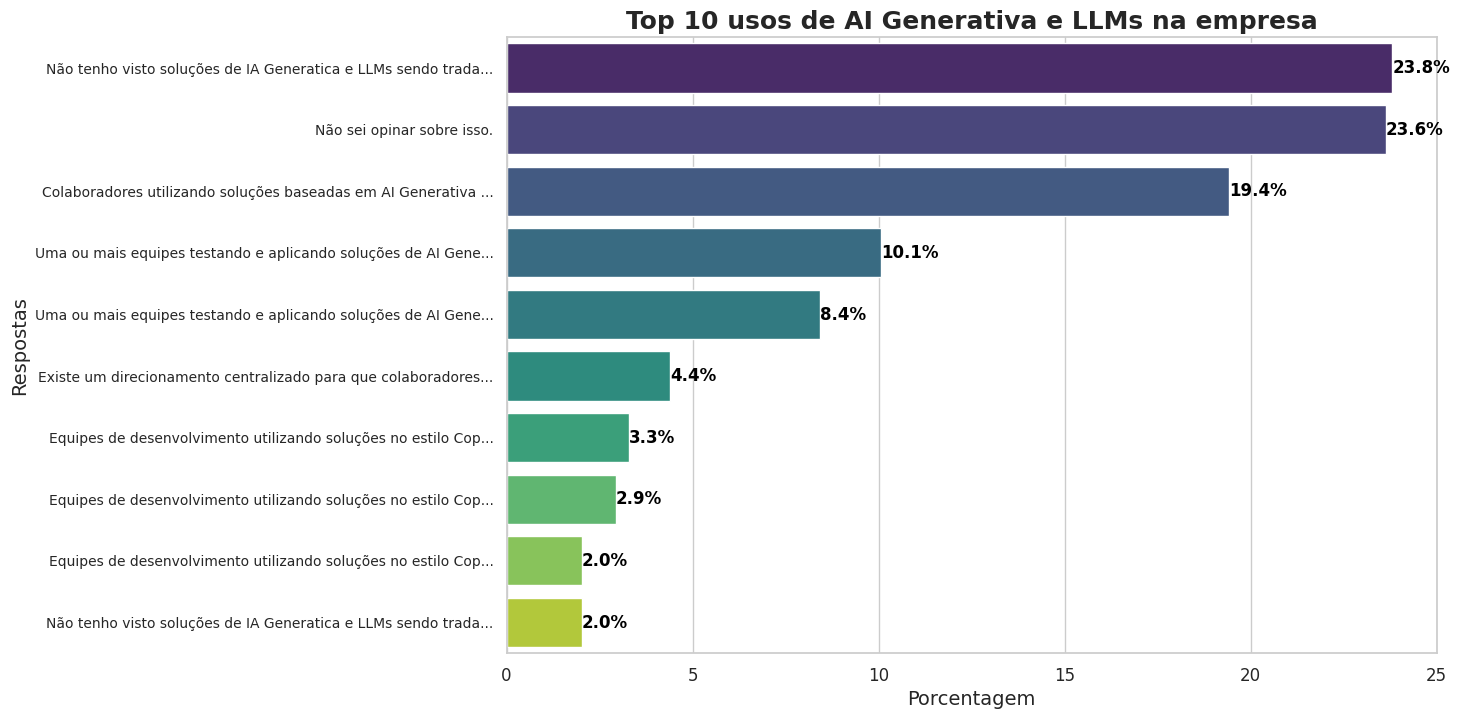

In [91]:
# Nome completo da coluna
column = "('P3_f ', 'Tipos de uso de AI Generativa e LLMs na empresa')"

# Filtrar os dados para contar as respostas
response_counts = data[column].value_counts().nlargest(10)  # Obter os 10 maiores valores

# Calcular porcentagens
total = response_counts.sum()
percentages = response_counts / total * 100

# Truncar o texto das respostas se for muito longo
truncated_labels = [label[:60] + '...' if len(label) > 60 else label for label in response_counts.index]

# Função para plotar gráfico simples com porcentagens e respostas truncadas
def plot_simple_analysis(response_counts, percentages, truncated_labels, title, xlabel='Porcentagem', ylabel='Respostas'):
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x=percentages.values, y=response_counts.index.to_numpy(), palette='viridis')
    
    for p, percentage in zip(ax.patches, percentages):
        x = p.get_width()
        y = p.get_y() + p.get_height() / 2
        ax.annotate(f'{percentage:.1f}%', (x, y), ha='left', va='center', fontsize=12, fontweight='bold', color='black')
    
    plt.title(title, fontsize=18, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(ticks=range(len(truncated_labels)), labels=truncated_labels, fontsize=10)  # Reduzir tamanho do texto das legendas
    plt.show()

# Análise individual para a pergunta sobre Tipos de uso de AI Generativa
plot_simple_analysis(response_counts, percentages, truncated_labels, 'Top 10 usos de AI Generativa e LLMs na empresa', ylabel='Respostas')
